In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
soja = pd.read_csv("soja.csv")
soja.head()

,Id,Fecha,Open,High,Low,Last,Cierre,Aj.Dif.,Mon.,OI.Vol.,OI.Dif.,Vol.Ope.,Unidad,DolarB.N.,DolarItau.,Dif.Sem
0,1,05/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,13.0,D,0,0,0,TONS,2.92,2.905,-221.0
1,2,06/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,0.0,D,0,0,0,TONS,2.88,2.87,-221.0
2,3,07/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,219.0,-2.0,D,0,0,0,TONS,2.865,2.882,-219.0
3,4,08/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,1.0,D,0,0,0,TONS,2.887,2.884,-220.0
4,5,09/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,0.0,D,0,0,0,TONS,2.892,2.9,-220.0


In [3]:
short_soja = soja[['Fecha','Cierre']]
short_soja

,Fecha,Cierre
0,05/01/2004 12:00:00 a.m.,221.0
1,06/01/2004 12:00:00 a.m.,221.0
2,07/01/2004 12:00:00 a.m.,219.0
3,08/01/2004 12:00:00 a.m.,220.0
4,09/01/2004 12:00:00 a.m.,220.0
...,...,...
3870,23/09/2019 12:00:00 a.m.,238.0
3871,24/09/2019 12:00:00 a.m.,238.0
3872,25/09/2019 12:00:00 a.m.,237.0
3873,26/09/2019 12:00:00 a.m.,236.0


In [4]:
short_soja['Fecha'] = pd.to_datetime(short_soja['Fecha'])
short_soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3875 non-null   datetime64[ns]
 1   Cierre  3875 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.7 KB


<ipython-input-4-6df5801bfbe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_soja['Fecha'] = pd.to_datetime(short_soja['Fecha'])


In [5]:
short_soja['Anio'] = short_soja['Fecha'].dt.year

<ipython-input-5-004754c7004d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_soja['Anio'] = short_soja['Fecha'].dt.year


In [6]:
short_soja

,Fecha,Cierre,Anio
0,2004-05-01,221.0,2004
1,2004-06-01,221.0,2004
2,2004-07-01,219.0,2004
3,2004-08-01,220.0,2004
4,2004-09-01,220.0,2004
...,...,...,...
3870,2019-09-23,238.0,2019
3871,2019-09-24,238.0,2019
3872,2019-09-25,237.0,2019
3873,2019-09-26,236.0,2019


In [7]:
means = short_soja.groupby(['Anio']).agg({'Cierre':'mean'})

Modifico la paleta de colores de manera que cada intensidad corresponda al ranking de su media.

In [8]:
sort = means.rank(method='min')
sort = sort['Cierre'].astype(int).to_list()
sort = np.array(sort)
menos = sort - 1
menos

array([ 2,  0,  1,  3, 11,  7,  9, 13, 15, 14, 12,  5,  8,  6, 10,  4])

In [9]:
colors = sns.light_palette("seagreen",means.size,as_cmap=False)
colors

[(0.921460863132993, 0.9512120106378944, 0.9302557793948234),
 (0.8720562827149765, 0.9241377458764138, 0.8909838254743842),
 (0.8226517022969599, 0.8970634811149333, 0.851711871553945),
 (0.7732471218789434, 0.8699892163534527, 0.8124399176335058),
 (0.7238425414609269, 0.8429149515919723, 0.7731679637130666),
 (0.6744379610429104, 0.8158406868304917, 0.7338960097926274),
 (0.6250333806248938, 0.7887664220690112, 0.6946240558721881),
 (0.5756288002068773, 0.7616921573075306, 0.655352101951749),
 (0.5262242197888608, 0.73461789254605, 0.6160801480313097),
 (0.4768196393708443, 0.7075436277845695, 0.5768081941108705),
 (0.4274150589528278, 0.6804693630230889, 0.5375362401904313),
 (0.3780104785348113, 0.6533950982616084, 0.49826428626999214),
 (0.32860589811679464, 0.6263208335001278, 0.4589923323495529),
 (0.2792013176987782, 0.5992465687386472, 0.4197203784291137),
 (0.22979673728076166, 0.5721723039771668, 0.38044842450867455),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353)]

In [10]:
colores_acomodados = []
for i in menos:
    colores_acomodados.append(colors[i])

colores_acomodados

[(0.8226517022969599, 0.8970634811149333, 0.851711871553945),
 (0.921460863132993, 0.9512120106378944, 0.9302557793948234),
 (0.8720562827149765, 0.9241377458764138, 0.8909838254743842),
 (0.7732471218789434, 0.8699892163534527, 0.8124399176335058),
 (0.3780104785348113, 0.6533950982616084, 0.49826428626999214),
 (0.5756288002068773, 0.7616921573075306, 0.655352101951749),
 (0.4768196393708443, 0.7075436277845695, 0.5768081941108705),
 (0.2792013176987782, 0.5992465687386472, 0.4197203784291137),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353),
 (0.22979673728076166, 0.5721723039771668, 0.38044842450867455),
 (0.32860589811679464, 0.6263208335001278, 0.4589923323495529),
 (0.6744379610429104, 0.8158406868304917, 0.7338960097926274),
 (0.5262242197888608, 0.73461789254605, 0.6160801480313097),
 (0.6250333806248938, 0.7887664220690112, 0.6946240558721881),
 (0.4274150589528278, 0.6804693630230889, 0.5375362401904313),
 (0.7238425414609269, 0.8429149515919723, 0.773167963713

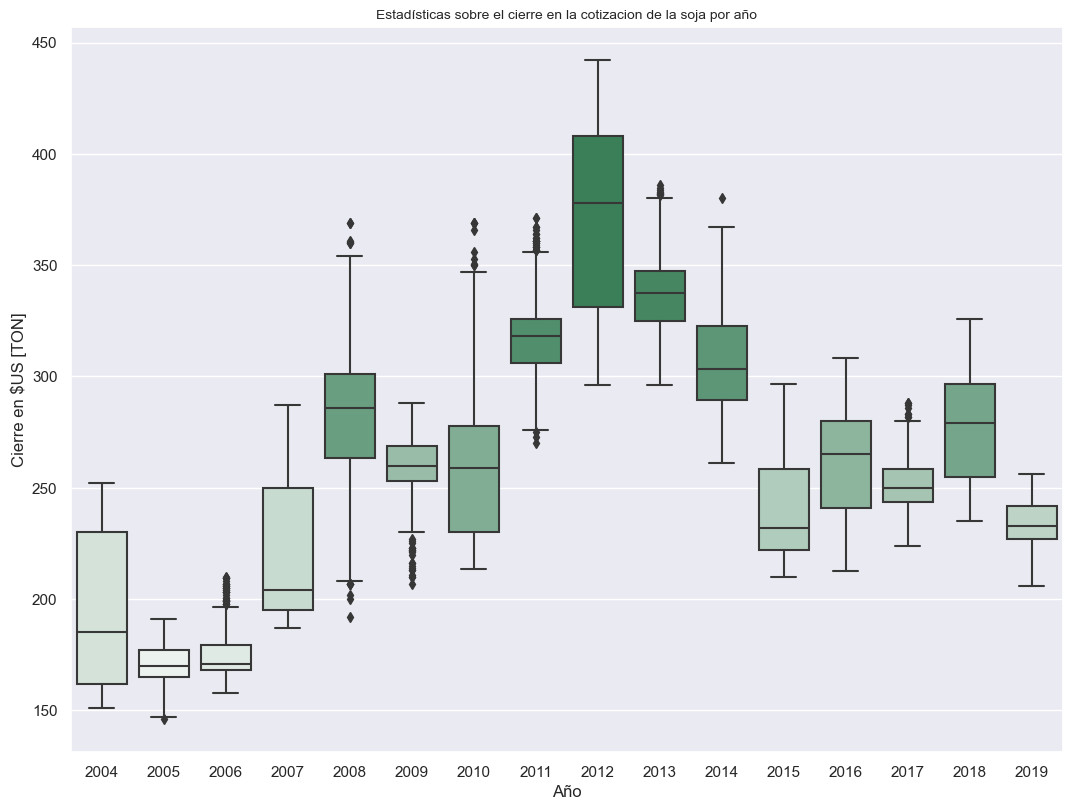

In [23]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(12.8,9.6)})
sns.light_palette("seagreen", as_cmap=True)

ax = sns.boxplot(x="Anio", y="Cierre",data=short_soja,palette=colores_acomodados)
ax.set_title("Estadísticas sobre el cierre en la cotizacion de la soja por año",fontdict={'fontsize':10})
ax.set_xlabel("Año")
ax.set_ylabel("Cierre en $US [TON]")

fig = ax.get_figure()
fig.savefig("box_plot_soja.png")

### Segunda visualización

In [12]:
short_soja['Cierre'].value_counts()

265.0    50
230.0    46
250.0    44
169.0    41
255.0    40
         ..
173.7     1
303.9     1
260.5     1
287.5     1
324.8     1
Name: Cierre, Length: 590, dtype: int64

In [13]:
short_soja['Mes'] = short_soja['Fecha'].dt.month

<ipython-input-13-ff7b0c8d2376>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_soja['Mes'] = short_soja['Fecha'].dt.month


In [14]:
anio_2019_soja = short_soja.loc[short_soja.Anio == 2019]
anio_2019_soja

,Fecha,Cierre,Anio,Mes
3694,2019-02-01,248.0,2019,2
3695,2019-03-01,248.0,2019,3
3696,2019-04-01,251.0,2019,4
3697,2019-07-01,252.0,2019,7
3698,2019-08-01,250.0,2019,8
...,...,...,...,...
3870,2019-09-23,238.0,2019,9
3871,2019-09-24,238.0,2019,9
3872,2019-09-25,237.0,2019,9
3873,2019-09-26,236.0,2019,9


In [15]:
mes_soja_2019 = anio_2019_soja.groupby(['Mes']).agg({'Cierre':'mean'})
mes_soja_2019

,Cierre
Mes,
1,246.315789
2,236.411765
3,229.210526
4,222.875000
5,229.071429
6,230.500000
7,230.552632
8,239.083333
9,236.875000


In [16]:
ranking_mes = mes_soja_2019.rank(method='min')
ranking_mes = ranking_mes['Cierre'].astype(int).to_list()
ranking_mes = np.array(ranking_mes)
ranking_mes = ranking_mes - 1
ranking_mes

array([11,  8,  3,  0,  2,  4,  5, 10,  9,  1,  7,  6])

In [17]:
orange_pallete = sns.color_palette("Oranges",ranking_mes.size)
orange_pallete

[(0.9976624375240293, 0.9257208765859285, 0.8537793156478277),
 (0.99520184544406, 0.8826758938869665, 0.7692733564013841),
 (0.9927412533640908, 0.8285428681276432, 0.6610073048827374),
 (0.9921568627450981, 0.756078431372549, 0.5388696655132641),
 (0.9921568627450981, 0.6727104959630912, 0.40587466359092667),
 (0.9921568627450981, 0.5915109573241062, 0.2902268358323722),
 (0.9781314878892734, 0.5108650519031142, 0.18737408688965784),
 (0.9486043829296424, 0.4222837370242214, 0.08648981161091887),
 (0.8930565167243367, 0.3402076124567474, 0.03547866205305651),
 (0.8211764705882354, 0.2718339100346021, 0.005090349865436363),
 (0.6956862745098039, 0.2275432525951557, 0.010011534025374854),
 (0.5892041522491349, 0.18800461361014995, 0.01334871203383314)]

In [18]:
orange_pallete_by_rank = []
for i in ranking_mes:
    orange_pallete_by_rank.append(orange_pallete[i])

orange_pallete_by_rank

[(0.5892041522491349, 0.18800461361014995, 0.01334871203383314),
 (0.8930565167243367, 0.3402076124567474, 0.03547866205305651),
 (0.9921568627450981, 0.756078431372549, 0.5388696655132641),
 (0.9976624375240293, 0.9257208765859285, 0.8537793156478277),
 (0.9927412533640908, 0.8285428681276432, 0.6610073048827374),
 (0.9921568627450981, 0.6727104959630912, 0.40587466359092667),
 (0.9921568627450981, 0.5915109573241062, 0.2902268358323722),
 (0.6956862745098039, 0.2275432525951557, 0.010011534025374854),
 (0.8211764705882354, 0.2718339100346021, 0.005090349865436363),
 (0.99520184544406, 0.8826758938869665, 0.7692733564013841),
 (0.9486043829296424, 0.4222837370242214, 0.08648981161091887),
 (0.9781314878892734, 0.5108650519031142, 0.18737408688965784)]

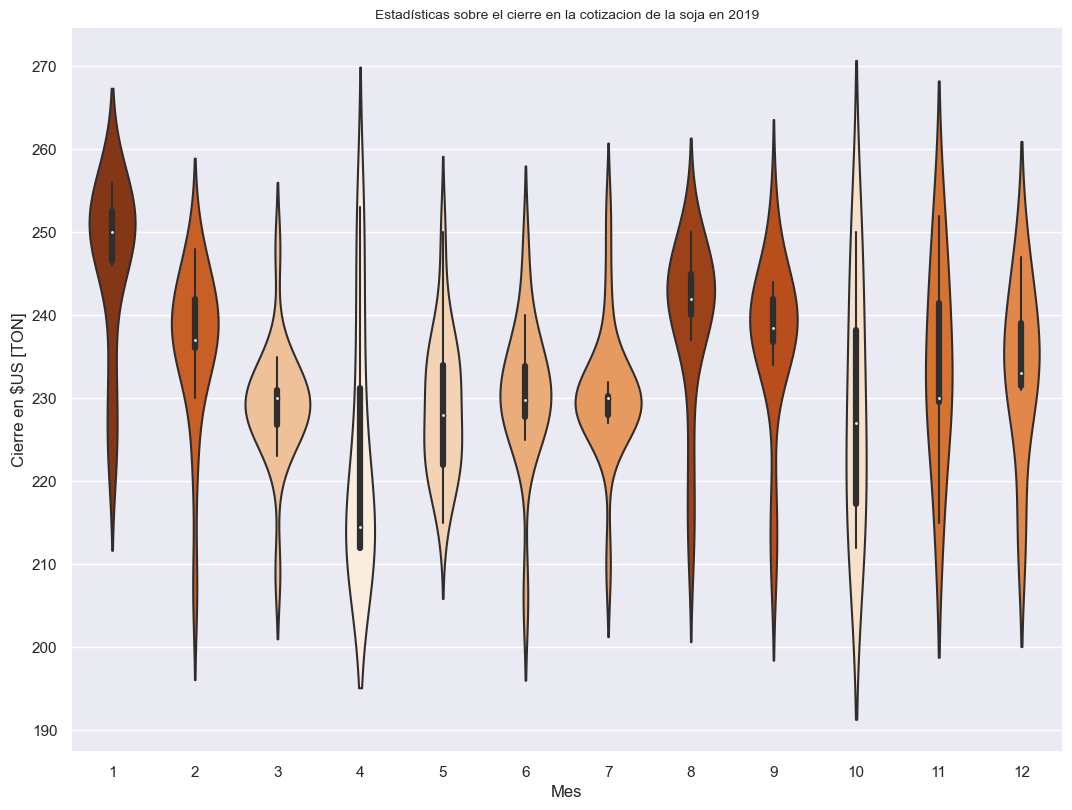

In [24]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(12.8,9.6)})
ax = sns.violinplot(x="Mes", y="Cierre",data=anio_2019_soja,palette=orange_pallete_by_rank)
ax.set_title("Estadísticas sobre el cierre en la cotizacion de la soja en 2019",fontdict={'fontsize':10})
ax.set_xlabel("Mes")
ax.set_ylabel("Cierre en $US [TON]")

fig = ax.get_figure()
fig.savefig("violinplot_soja.png")